## Load Data


In [10]:
import pandas as pd

swiggy_df = pd.read_csv('/content/swiggy.csv')
print("Swiggy dataset loaded successfully. First 5 rows:")
print(swiggy_df.head())

Swiggy dataset loaded successfully. First 5 rows:
    ID         Area       City         Restaurant  Price  Avg ratings  \
0  211  Koramangala  Bangalore        Tandoor Hut  300.0          4.4   
1  221  Koramangala  Bangalore      Tunday Kababi  300.0          4.1   
2  246    Jogupalya  Bangalore            Kim Lee  650.0          4.4   
3  248  Indiranagar  Bangalore  New Punjabi Hotel  250.0          3.9   
4  249  Indiranagar  Bangalore                Nh8  350.0          4.0   

   Total ratings                                          Food type  \
0            100          Biryani,Chinese,North Indian,South Indian   
1            100                                   Mughlai,Lucknowi   
2            100                                            Chinese   
3            500               North Indian,Punjabi,Tandoor,Chinese   
4             50  Rajasthani,Gujarati,North Indian,Snacks,Desser...   

        Address  Delivery time  
0     5Th Block             59  
1     5Th Block   

## Initial Data Inspection and Preprocessing


In [11]:
print("\nDataFrame Info:")
swiggy_df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB


Data inspection is to check for missing values in each column of the DataFrame to understand data completeness.



In [12]:
print("\nMissing values per column:")
print(swiggy_df.isnull().sum())


Missing values per column:
ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64


Following the data inspection steps, the next action is to check for duplicate rows in the DataFrame to ensure data uniqueness.



In [13]:
print("\nNumber of duplicate rows:")
print(swiggy_df.duplicated().sum())


Number of duplicate rows:
0


## Restaurant Distribution by City
Analyze and visualize the number of restaurants across different cities using a bar chart.


In [14]:
restaurant_counts_by_city = swiggy_df['City'].value_counts()
print("Number of restaurants per city:")
print(restaurant_counts_by_city.head())

Number of restaurants per city:
City
Kolkata      1346
Mumbai       1277
Chennai      1106
Pune         1090
Hyderabad    1075
Name: count, dtype: int64


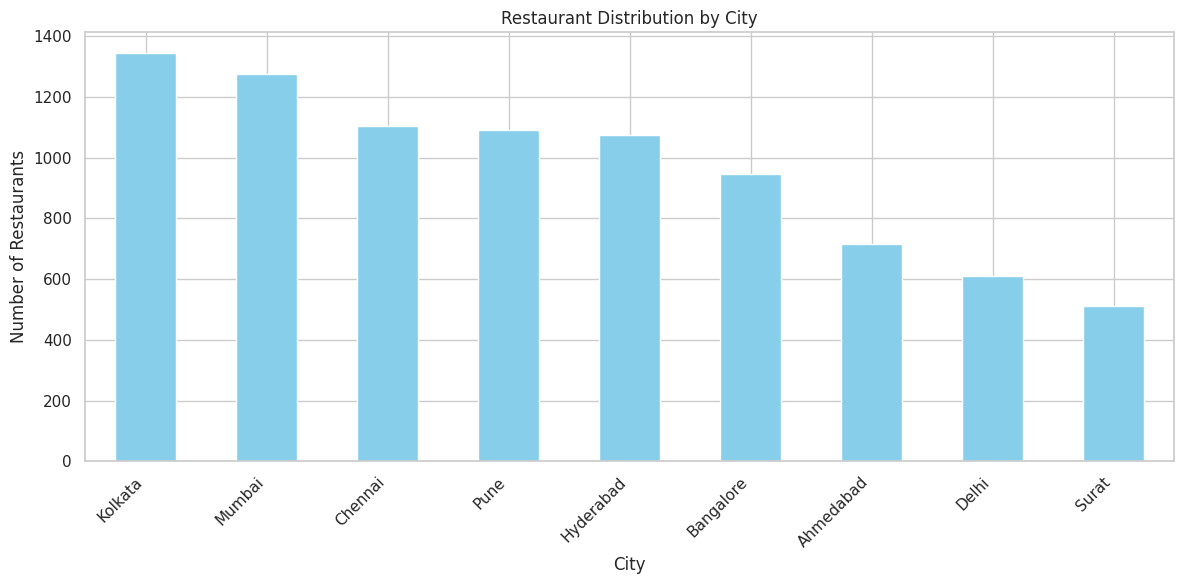

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
restaurant_counts_by_city.plot(kind='bar', color='skyblue')
plt.title('Restaurant Distribution by City')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Average Ratings Distribution
Examine the distribution of 'Avg ratings' through a histogram plot to understand overall customer satisfaction trends.


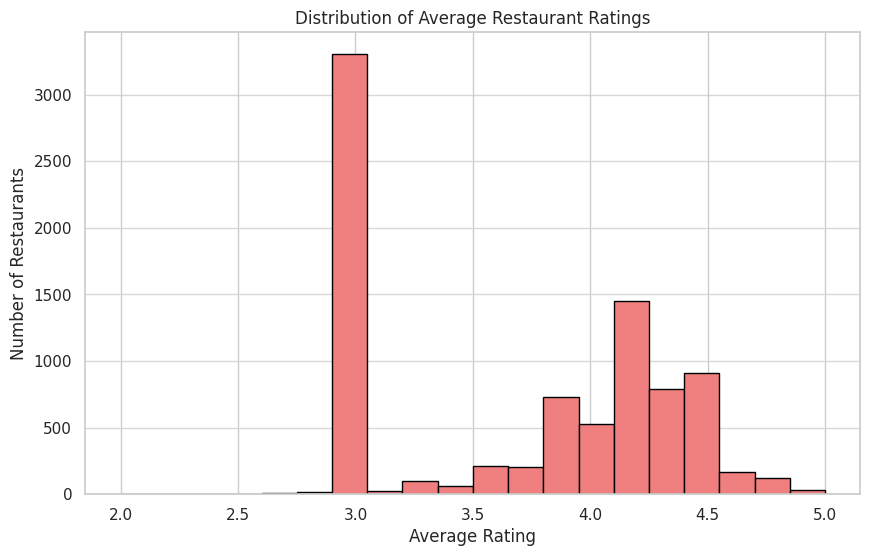

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(swiggy_df['Avg ratings'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Average Restaurant Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Restaurants')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Top Rated Restaurants
Identify and visualize the top 10 restaurants based on their average ratings.


In [17]:
top_10_restaurants = swiggy_df.sort_values(by='Avg ratings', ascending=False).head(10)
print("Top 10 Restaurants by Average Rating:")
print(top_10_restaurants[['Restaurant', 'Avg ratings']])

Top 10 Restaurants by Average Rating:
                              Restaurant  Avg ratings
5424                     Get In My Belly          5.0
5425                  The Asian Pavilion          5.0
5519                         Cafe Kokomo          5.0
8571                              Afresh          5.0
6297                           Fat Tiger          5.0
6033  Zorro - Milkshakes And Thickshakes          5.0
5885                    Nivala Apka Apna          5.0
5936                       Tricky Shakes          5.0
6390                        Nasi And Mee          5.0
5684                           Papacream          5.0


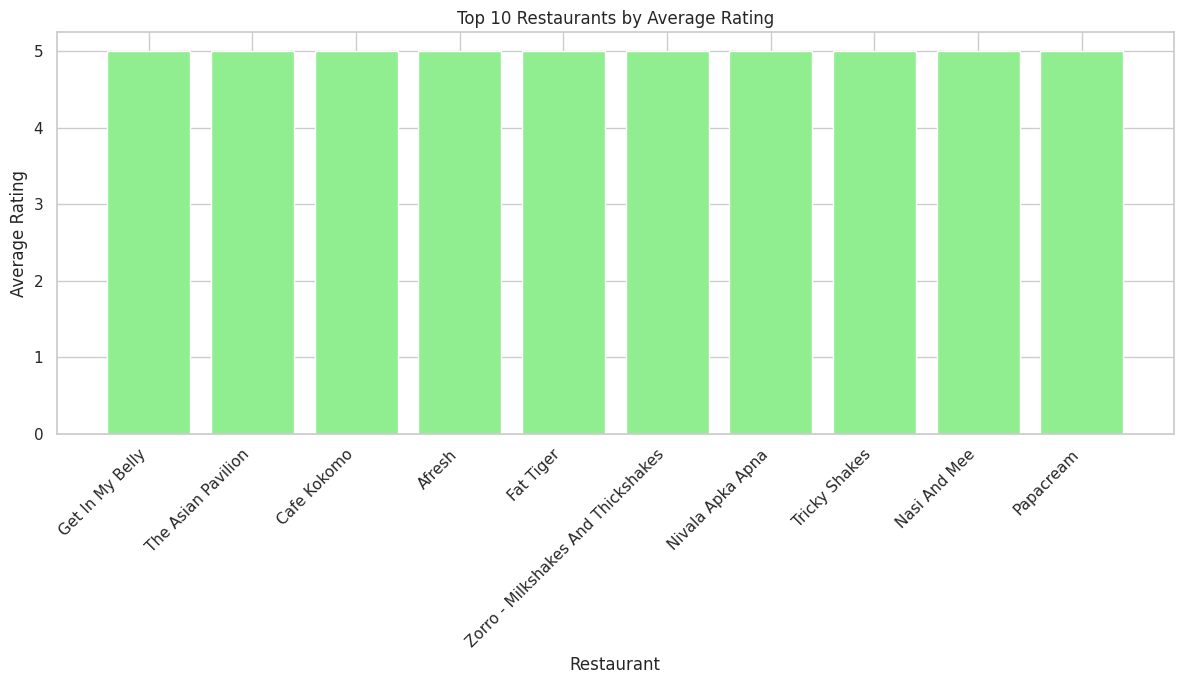

In [18]:
plt.figure(figsize=(12, 7))
plt.bar(top_10_restaurants['Restaurant'], top_10_restaurants['Avg ratings'], color='lightgreen')
plt.title('Top 10 Restaurants by Average Rating')
plt.xlabel('Restaurant')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Food Type Popularity
Determine and visualize the most common food types offered by restaurants to identify popular cuisines.


In [19]:
all_food_types = swiggy_df['Food type'].str.split(',').explode()
cleaned_food_types = all_food_types.str.strip()
food_type_counts = cleaned_food_types.value_counts()

print("Top 10 Food Types:")
print(food_type_counts.head(10))

Top 10 Food Types:
Food type
Chinese         2588
North Indian    1921
Indian          1772
Fast Food       1550
Beverages       1524
Desserts        1436
Biryani         1079
Snacks          1013
South Indian     857
Continental      686
Name: count, dtype: int64


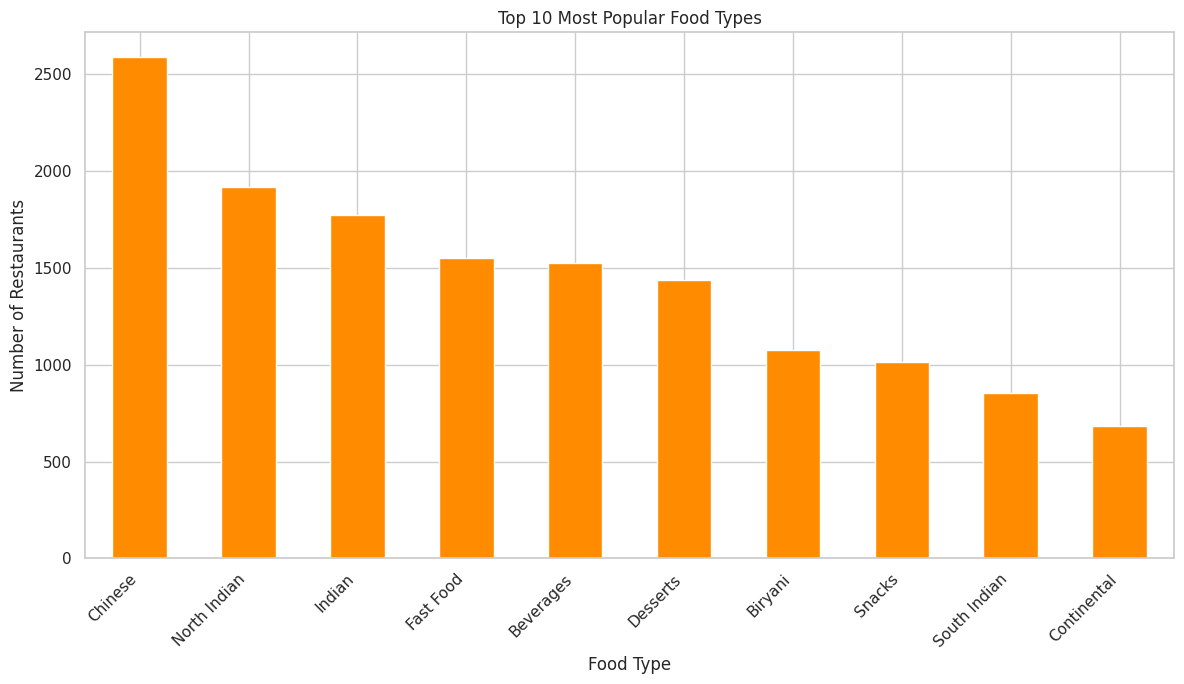

In [20]:
top_10_food_types = food_type_counts.head(10)

plt.figure(figsize=(12, 7))
top_10_food_types.plot(kind='bar', color='darkorange')
plt.title('Top 10 Most Popular Food Types')
plt.xlabel('Food Type')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summarize Key Findings
Summary of the key findings from the Swiggy data analysis report, highlighting insights from restaurant distribution, ratings, and food type popularity.


## Summary:

### Data Analysis Key Findings

*   **Data Quality:** The Swiggy dataset was found to be clean, with no missing values or duplicate rows across its 8680 entries and 10 columns. Key columns like 'Price', 'Avg ratings', 'Total ratings', and 'Delivery time' were already in appropriate numeric formats, requiring no initial cleaning or type conversion.
*   **Geographical Distribution:** Kolkata leads in the number of listed restaurants with 1346, followed closely by Mumbai (1277), Chennai (1106), Pune (1090), and Hyderabad (1075), indicating a strong presence in these major Indian cities.
*   **Average Ratings Distribution:** The distribution of average restaurant ratings shows a significant concentration of restaurants with high ratings, with all of the top 10 restaurants achieving a perfect average rating of 5.0. This suggests a tendency for highly-rated establishments to be prominent in the dataset.
*   **Popular Food Types:** "Chinese" is the most popular food type, offered by 2588 restaurants. "North Indian" (1921 restaurants), "Indian" (1772 restaurants), and "Fast Food" (1550 restaurants) are also highly prevalent, highlighting a diverse but regionally favored culinary landscape.

